# K-Means Clustering
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
print(plt.get_backend())

import seaborn as sns
import numpy as np
import pandas as pd
import scipy.io as sio

module://ipykernel.pylab.backend_inline


In [2]:
mat = sio.loadmat('ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


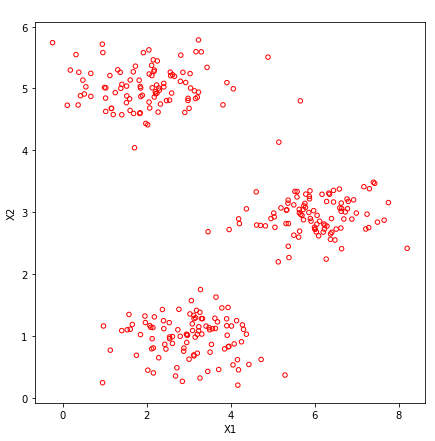

In [3]:
# Visualize the example dataset
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data2.X1, data2.X2, color='', marker='o', edgecolors='r', s=20, label=" ")
#ax.legend(loc=2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title(' ')
plt.show()

In [7]:
X = data2.values

In [8]:
def findClosestCentroids(X, centroids):
    [m, n] = X.shape
    K = centroids.shape[0]
    idx = np.zeros([m, 1])
    value = np.zeros([K, 1])
    
    for i in range(m):
        for j in range(K):
            value[j] = np.sum(np.power(X[i,:] - centroids[j,:], 2))
        idx[i] = np.argmin(value)
        
    return idx

In [9]:
initial_centroids = np.array([[3, 3],[6, 2], [8, 5]]);
idx = findClosestCentroids(X, initial_centroids);
idx[0:3] # the closest centroids should be 0, 2, 1 respectively

array([[0.],
       [2.],
       [1.]])

In [10]:
def computeCentroids(X, idx, K):
    [m, n] = X.shape
    centroids = np.zeros([K, n]);
    for i in range(K):
        temp=np.where(idx==i)
        centroids[i,:]=np.sum(X[temp,:][0], 0) / X[temp,:][0].shape[0]
        
    return centroids

In [11]:
centroids = computeCentroids(X, idx, 3); centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [12]:
# Settings for running K-Means
K = 3;
max_iters = 10;
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

K-Means iteration  1/10 [2.42830111 3.15792418][5.81350331 2.63365645][7.11938687 3.6166844 ]
K-Means iteration  2/10 [2.31325526 3.22830617][5.33273768 2.43159599][6.8653618  3.23293995]
K-Means iteration  3/10 [2.19692479 3.42136707][4.83555397 2.12976745][6.6560054 3.0751355]
K-Means iteration  4/10 [1.98241171 4.0250785 ][3.91150763 1.47060546][6.34008592 3.05366642]
K-Means iteration  5/10 [1.95399466 5.02557006][3.12663743 1.1121712 ][6.12919526 3.01606258]
K-Means iteration  6/10 [1.95399466 5.02557006][3.04367119 1.01541041][6.03366736 3.00052511]
K-Means iteration  7/10 [1.95399466 5.02557006][3.04367119 1.01541041][6.03366736 3.00052511]
K-Means iteration  8/10 [1.95399466 5.02557006][3.04367119 1.01541041][6.03366736 3.00052511]
K-Means iteration  9/10 [1.95399466 5.02557006][3.04367119 1.01541041][6.03366736 3.00052511]
K-Means iteration 10/10 [1.95399466 5.02557006][3.04367119 1.01541041][6.03366736 3.00052511]


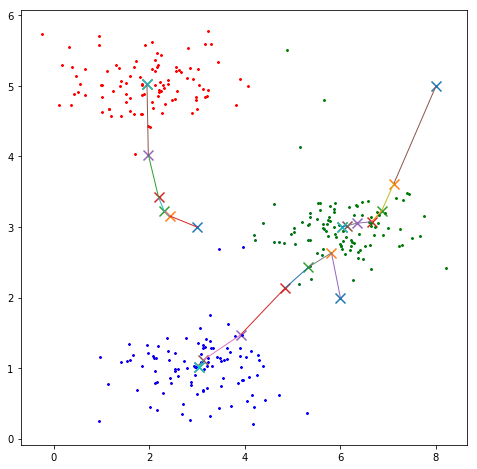

In [13]:
## Running K-Means clustering on example dataset.

fig, ax = plt.subplots(figsize=(8,8))

centroids = initial_centroids.copy();
previous_centroids = centroids.copy();
idx = np.zeros([X.shape[0], 1]);
# Run K-Means
for i in range(max_iters):
    # For each example in X, assign it to the closest centroid
    idx = findClosestCentroids(X, centroids);
    
    colors = list(['r', 'B', 'g'])
    for j in range(K):
        temp = np.where(idx==j)
        plt.scatter(X[temp,0][0], X[temp, 1][0], marker='.', color=colors[j], edgecolors=colors[j], linewidths=0, s=15, cmap=plt.get_cmap('hsv'))
    plt.scatter(centroids[:,0], centroids[:, 1], marker='x', linewidths=10, s=100)
    
    # Optionally, plot progress here
    for k in range(centroids.shape[0]):
        plt.plot([centroids[k, 0],previous_centroids[k, 0]],[centroids[k, 1],previous_centroids[k, 1]], linewidth=0.99)

    previous_centroids = centroids.copy();
    # Given the memberships, compute new centroids
    centroids = computeCentroids(X, idx, K);
    
    v_count = str(i+1); 
    if i < 9: v_count = ' ' + str(i+1);
    print('K-Means iteration ' + v_count + '/' + str(max_iters) + ' ' + str(centroids[0]) + str(centroids[1]) + str(centroids[2]))

# K-Means Clustering on Pixels 
---
In this exercise, you will use K-Means to compress an image.  
To do this, you will first run K-Means on the colors of the pixels in the image and then you will map each pixel onto its closest centroid.

In [4]:
img = sio.loadmat('bird_small.mat')
img.keys()
# Need to divide by 255 so that all values are in the range 0 - 1
img = img.get('A') / 255
# or
img = plt.imread('bird_small.png') # It's already divided by 255

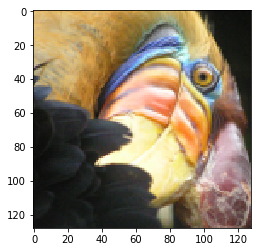

In [5]:
plt.imshow(img)

In [16]:
# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = img.reshape(img.shape[0] * img.shape[1], 3)

# Running K-Means clustering on example dataset.
---

In [17]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids randomly. 
[m, n] = X.shape
idx = np.random.randint(0, m, K)
initial_centroids =  X[idx, :]

# Initialization parameter
centroids = initial_centroids.copy();
previous_centroids = centroids.copy();
idx = np.zeros([X.shape[0], 1]);

# Run K-Means
for i in range(max_iters):
    # For each example in X, assign it to the closest centroid
    idx = findClosestCentroids(X, centroids);

    # Given the memberships, compute new centroids
    centroids = computeCentroids(X, idx, K);
    
    v_count = str(i+1); 
    if i < 9: v_count = ' ' + str(i+1);
    print_centroids = ''
    for l in range(K): print_centroids += str(centroids[l,:])
    print('K-Means iteration ' + v_count + '/' + str(max_iters) + ' ' + str(print_centroids) + '\n')

K-Means iteration  1/10 [0.9592244  0.86419094 0.5989446 ][0.09851103 0.10138178 0.08736493][0.83595169 0.69367367 0.44813147][0.7678864 0.777408  0.820306 ][0.17488    0.17306241 0.16467421][0.91724604 0.68934751 0.59113759][0.99027783 0.95424414 0.73066097][0.47991875 0.41975477 0.39255503][0.64636856 0.54937184 0.43020865][0.98810124 0.94428945 0.82519656][0.4349561  0.33090454 0.23111066][0.91977626 0.84799337 0.69145048][0.08347812 0.09460876 0.0913685 ][0.78165674 0.53459007 0.22061437][0.06689429 0.07340237 0.06145904][0.38741055 0.46683437 0.67811036]

K-Means iteration  2/10 [0.95379853 0.86429214 0.57136035][0.10893866 0.11636052 0.10496818][0.84274685 0.69255167 0.43486261][0.74083179 0.75494486 0.80319601][0.19324526 0.18934357 0.18386145][0.86785632 0.69937813 0.60045743][0.98342258 0.9429006  0.72193885][0.48329386 0.41828442 0.38874114][0.64883602 0.55613816 0.46029457][0.98033291 0.95331699 0.84904736][0.43094292 0.32980868 0.22517473][0.943892   0.82105595 0.70810294][

<IPython.core.display.Javascript object>


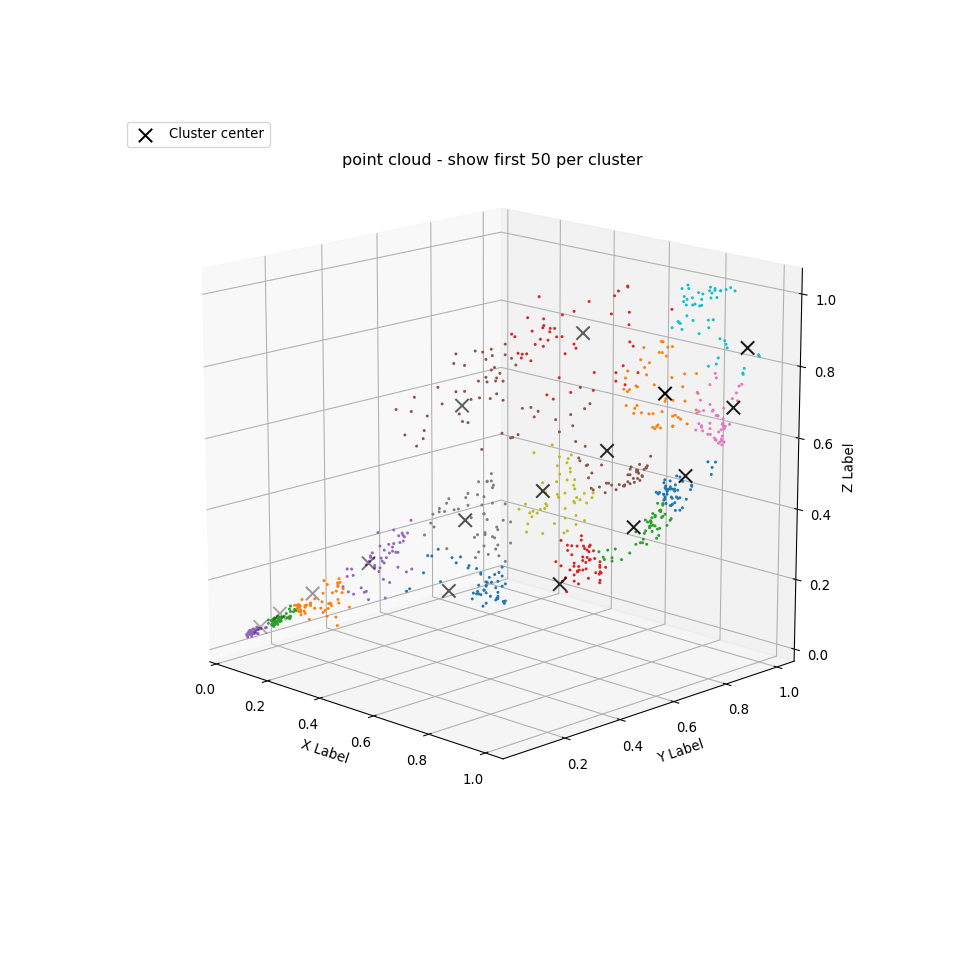

In [20]:
# Visualize data set by different cluster and cluster center
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

#fig, ax = plt.subplots(figsize=(8,8))
fig = plt.figure(dpi=80, figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
dis_count = 50

plt.title('point cloud - show first ' + str(dis_count) + ' per cluster')

for j in range(K):
    temp = np.where(idx==j)
    x = X[temp, :][0][0:dis_count, 0]
    y = X[temp, :][0][0:dis_count, 1]
    z = X[temp, :][0][0:dis_count, 2]
    #ax.scatter(x, y , marker='.', linewidths=0, s=15, cmap=plt.get_cmap('hsv'))
    ax.scatter(x, y ,z , marker='.', linewidth=0, alpha=1, cmap='spectral')
        
# Optionally, plot progress here
ax.scatter(centroids[:,0], centroids[:, 1], centroids[:, 2], marker='x', color='black', linewidths=10, s=100, label='Cluster center')
#for k in range(centroids.shape[0]):
#    ax.plot([centroids[k, 0],previous_centroids[k, 0]],[centroids[k, 1],previous_centroids[k, 1]], [centroids[k, 2],previous_centroids[k, 2]], color='black', linewidth=1)

#ax.axis('scaled') 
ax.legend(loc=2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Image Compression
---

In [21]:
# Applying K-Means to compress an image.
# Essentially, now we have represented the image X as in terms of the indices in idx. 
# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value

#X_recovered = np.zeros([m, n])
#for i in range(idx.shape[0]):
#    X_recovered[i, :] = centroids[int(idx[i]), :]
X_recovered = centroids[idx.astype(int)][:,0,:]

In [22]:
compressed_img_16 = X_recovered.reshape(128, 128, 3);

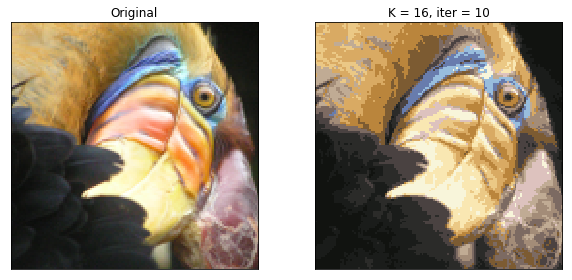

In [23]:
# Display compressed image side by side
%matplotlib inline
fig = plt.figure(num=1, figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.imshow(img)
ax1.set_title('Original')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax2 = fig.add_subplot(222)
ax2.imshow(compressed_img_16)
ax2.set_title('K = 16, iter = 10')
plt.xticks(np.array([]))
plt.yticks(np.array([]));

# Now, to try different values of K and max_iters here

In [24]:
def calculateDiffK(X, K, epoch=10):
    
    # When using K-Means, it is important the initialize the centroids randomly. 
    [m, n] = X.shape
    idx = np.random.randint(0, m, K)
    centroids =  X[idx, :]

    idx = np.zeros([X.shape[0], 1]);

    # Run K-Means
    for i in range(epoch):
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids);

        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K);
        
    X_recovered = centroids[idx.astype(int)][:,0,:]
        
    return X_recovered.reshape(128, 128, 3)

In [25]:
X_recovered_8_1 = calculateDiffK(X, 8, 1)
X_recovered_8_10 = calculateDiffK(X, 8, 10)
X_recovered_16_1 = calculateDiffK(X, 16, 1)
X_recovered_16_10 = calculateDiffK(X, 16, 10)
X_recovered_32_1 = calculateDiffK(X, 32, 1)
X_recovered_32_10 = calculateDiffK(X, 32, 10)
X_recovered_64_1 = calculateDiffK(X, 64, 1)
X_recovered_64_10 = calculateDiffK(X, 64, 10)

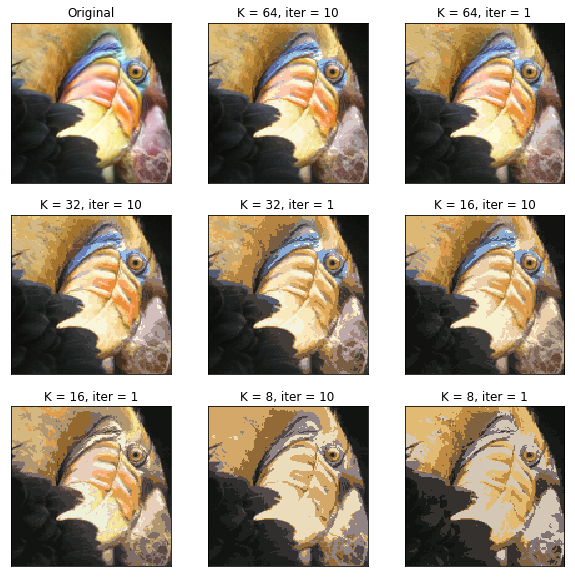

In [26]:
# Display compressed image side by side
%matplotlib inline
fig = plt.figure(num=1, figsize=(10,10))

ax1 = fig.add_subplot(331)
ax1.imshow(img)
ax1.set_title('Original')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax2 = fig.add_subplot(332)
ax2.imshow(X_recovered_64_10)
ax2.set_title('K = 64, iter = 10')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax3 = fig.add_subplot(333)
ax3.imshow(X_recovered_64_1)
ax3.set_title('K = 64, iter = 1')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax4 = fig.add_subplot(334)
ax4.imshow(X_recovered_32_10)
ax4.set_title('K = 32, iter = 10')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax5 = fig.add_subplot(335)
ax5.imshow(X_recovered_32_1)
ax5.set_title('K = 32, iter = 1')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax6 = fig.add_subplot(336)
ax6.imshow(X_recovered_16_10)
ax6.set_title('K = 16, iter = 10')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax7 = fig.add_subplot(337)
ax7.imshow(X_recovered_16_1)
ax7.set_title('K = 16, iter = 1')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax8 = fig.add_subplot(338)
ax8.imshow(X_recovered_8_10)
ax8.set_title('K = 8, iter = 10')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

ax9 = fig.add_subplot(339)
ax9.imshow(X_recovered_8_1)
ax9.set_title('K = 8, iter = 1')
plt.xticks(np.array([]))
plt.yticks(np.array([]));

# Try to execute multiple random init and pick the best one to return

In [41]:
def multipleRunKMean(X, K=16, epoch=10, select_count=10, tol=0.0001):
    
    # When using K-Means, it is important the initialize the centroids randomly. 
    [m, n] = X.shape
    cost = []

    for i in range(select_count):
        
        print('starting ' + str(i+1) + '/' + str(select_count) + ' selection')
    
        idx = np.zeros([m, 1]);
        centroids = X[np.random.randint(0, m, K), :]
        cost_progress = []
        v_bread_flag = False;
        
        # Run K-Means
        for _ in range(epoch):
            # For each example in X, assign it to the closest centroid
            idx = findClosestCentroids(X, centroids);
            # Given the memberships, compute new centroids
            centroids = computeCentroids(X, idx, K);
            
            X_recovered = centroids[idx.astype(int)][:,0,:]    
            euclidean_distances = np.apply_along_axis(func1d = np.linalg.norm,
                                                      axis = 1,
                                                      arr = X - X_recovered).sum() / m
            
            print('\t' + str(_) + 'th Cost is ' + str(euclidean_distances))
            
            cost_progress.append(euclidean_distances)
            
            ## early break
            #if v_bread_flag: break;
            #if len(cost_progress) > 1:  
            #    if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
            #        v_bread_flag = True
                
        cost.append(cost_progress[-1])
    
    return 'Selection ' + str(np.argmin(cost) + 1) + ' loss is the smallest --> ' + str(cost[np.argmin(cost)])

    #np.array([function() for _ in range(xxx)]) -> it will return a numpy array of restult(the result can be a array as w)

In [42]:
multipleRunKMean(X)

starting 1/10 selection
	0th Cost is 0.08562647152952312
	1th Cost is 0.07771369330034159
	2th Cost is 0.07574831996846337
	3th Cost is 0.07518962213066768
	4th Cost is 0.07498585504476131
	5th Cost is 0.07489292565285804
	6th Cost is 0.07485163796545931
	7th Cost is 0.07480227414243028
	8th Cost is 0.07473538325886706
	9th Cost is 0.07466968603215454
starting 2/10 selection
	0th Cost is 0.09050367086898245
	1th Cost is 0.08795113314608896
	2th Cost is 0.0870283150286705
	3th Cost is 0.08626022846887632
	4th Cost is 0.08554169208387574
	5th Cost is 0.08496289667245337
	6th Cost is 0.08449733490755809
	7th Cost is 0.0840815268661986
	8th Cost is 0.08365097199455487
	9th Cost is 0.08320975224775909
starting 3/10 selection
	0th Cost is 0.08607765428884101
	1th Cost is 0.08181312297177512
	2th Cost is 0.08040776442451522
	3th Cost is 0.07955062338845631
	4th Cost is 0.07885534175777709
	5th Cost is 0.07825788381017554
	6th Cost is 0.07773192893152872
	7th Cost is 0.07727028548678587
	8th C

'Selection 5 loss is the smallest --> 0.07417620991895758'